In [68]:
import pandas as pd
import numpy as np
winkelr = pd.read_excel("md_winkelrichtgröße.xlsx")
winkelr = winkelr.iloc[:,:]
#print(lange_spule.to_latex(index = False, column_format= "c c", na_rep = "-", float_format="%.3f"))

mittelwert = np.mean(winkelr)
#print(mittelwert)

def winkelricht(F, r, phi): #Phi in Winkel
    D = (F*r) / (phi * (np.pi) / 180)
    return D

arr = pd.DataFrame(winkelr).to_numpy()
phi = arr[:,0]
F = arr[:,1]

D = winkelricht(F,0.2,phi)
D = np.transpose(D)
mittelwertD = np.mean(D)
standartabw = np.std(D)
#print(mittelwertD)
print(standartabw)
#np.savetxt('WinkelrichtgrößeWerte.txt', D, fmt='%f')

0.002952928161464375


In [44]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

abstand = pd.read_excel("md_eigenträgheitsmoment.xlsx")
abstand = abstand.iloc[:,:]
#print(abstand.to_latex(index = False, column_format= "c c", na_rep = "-", float_format="%.3f"))
arr = pd.DataFrame(abstand).to_numpy()

arr2  = np.square(arr)
r2 = arr2[:,0]
T2 = arr2[:,1]
arr = np.c_[arr, r2, T2]

arr =  pd.DataFrame(data=arr)
print(arr.to_latex(index = False, column_format= "c c c c", na_rep = "-", float_format="%.3f"))


\begin{tabular}{c c c c}
\toprule
    0 &     1 &     2 &      3 \\
\midrule
0.050 & 2.750 & 0.003 &  7.562 \\
0.075 & 3.100 & 0.006 &  9.610 \\
0.100 & 3.800 & 0.010 & 14.440 \\
0.125 & 4.100 & 0.016 & 16.810 \\
0.150 & 4.750 & 0.022 & 22.562 \\
0.175 & 5.300 & 0.031 & 28.090 \\
0.200 & 5.800 & 0.040 & 33.640 \\
0.225 & 6.600 & 0.051 & 43.560 \\
0.250 & 7.150 & 0.062 & 51.123 \\
0.275 & 7.800 & 0.076 & 60.840 \\
\bottomrule
\end{tabular}



a = 724.885 ± 10.115
b = 5.945 ± 0.400


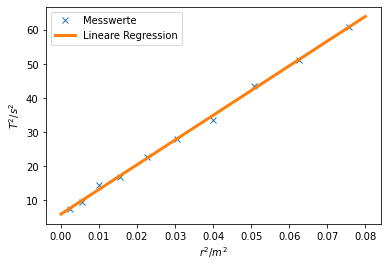

In [67]:
# Lineare Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
np.set_printoptions(suppress=True)

#Daten
abstand = pd.read_excel("md_eigenträgheitsmoment.xlsx")
abstand = abstand.iloc[:,:]
arr = pd.DataFrame(abstand).to_numpy()
arr2  = np.square(arr)
r2 = arr2[:,0]
T2 = arr2[:,1]

#Ausgleichsrechnung

params, covariance_matrix = np.polyfit(r2, T2, deg=1, cov=True)

errors = np.sqrt(np.diag(covariance_matrix))

for name, value, error in zip('ab', params, errors):
    print(f'{name} = {value:.3f} ± {error:.3f}')


x_plot = np.linspace(0, 0.08)
plt.plot(r2,T2,'x', label="Messwerte")
plt.plot(
    x_plot,
    params[0] * x_plot + params[1],
    label='Lineare Regression',
    linewidth=3,
)
plt.xlabel(r'$r^2 / m^2$')
plt.ylabel(r'$T^2 / s^2$')
plt.legend(loc="best")

#Speichern des Plots (und überprüfen ob schon vorhanden)
path = '/pictures/'
if os.path.exists('Lineare Regression.pdf'):
    os.remove('Lineare Regression.pdf')
plt.savefig('pictures/Lineare Regression.pdf')